# Business Understanding

Title: Musical Instrument Sales and Shipping, Author: Preston Moore, Date: 5 February, 2024


In [3]:
# import the data
import pandas as pd

path = 'listings.csv'

# place the data in a Pandas DataFrame
df = pd.read_csv(path)

# look at the first five rows of data
df.head()

,state,new_listing,title,condition,inventory,sku,make,model,description,year,...,id,auto_offer_percentage,auto_offer_message,auto_offer_shipping_price_override,bump_rate,bump_rate_recommendation,sold_as_is,country_of_origin,same_day_shipping_eligible,trigger_combine_and_save_shipping
0,ended,False,Fender Blues Junior 1995 Tweed USA-Made,Very Good,0,rev-696212,Fender,Blues Junior,&nbsp;This is the Tweed version of the Fender ...,1995,...,696212,NaN,NaN,NaN,NaN,NaN,False,US,True,False
1,ordered,False,Ibanez MS10 Metal Charger MIJ Green,Good,0,rev-696237,Ibanez,MS10 Metal Charger,"Great condition, with one small ding on the si...",1990s,...,696237,NaN,NaN,NaN,NaN,NaN,False,JP,True,False
2,ended,False,Ibanez Prime Dual Chorus PC-10 Blue,Very Good,0,rev-696240,Ibanez,Prime Dual Chorus,"Ibanez Prime Dual Chorus, model PC-10. Not a c...",NaN,...,696240,NaN,NaN,NaN,NaN,NaN,False,JP,True,False
3,ended,False,Mint Condition Fender Standard Telecaster 2014...,Mint,0,rev-749661,Fender,Standard Telecaster,Fender Standard Tele. Its a 2014-2015 Model. L...,2014,...,749661,NaN,NaN,NaN,NaN,NaN,False,MX,True,False
4,ended,False,HSH Japanese Fender Stratocaster 1990s Black M...,Good,0,rev-751239,Fender,Stratocaster,1990s Japanese Fender Strat body. It is matte ...,1990s,...,751239,NaN,NaN,NaN,NaN,NaN,False,JP,True,False


#### Initial Data Cleaning - Removing Exact Duplicates

In [4]:
# let's look at the dimensions of the dataset.
df.shape

(213, 63)

In [5]:
# looking at all the unique values in each column of the dataset.
for column in df:
    print(f'{column}: {df[column].nunique()}')

state: 5
new_listing: 1
title: 206
condition: 8
inventory: 4
sku: 213
make: 89
model: 194
description: 208
year: 42
finish: 65
price: 96
product_type: 11
subcategory_1: 54
subcategory_2: 9
product_image_1: 206
product_image_2: 200
product_image_3: 187
product_image_4: 181
product_image_5: 170
product_image_6: 162
product_image_7: 147
product_image_8: 132
product_image_9: 113
product_image_10: 99
product_image_11: 83
product_image_12: 66
product_image_13: 55
product_image_14: 51
product_image_15: 42
product_image_16: 33
product_image_17: 26
product_image_18: 25
product_image_19: 19
product_image_20: 18
product_image_21: 16
product_image_22: 14
product_image_23: 13
product_image_24: 13
product_image_25: 9
video_url: 5
offers_enabled: 2
shipping_price: 26
combine_and_save_shipping_price: 0
local_pickup: 2
shipping_profile_name: 0
seller_cost: 1
tax_exempt: 1
upc: 4
upc_does_not_apply: 2
published_at: 203
url: 213
id: 213
auto_offer_percentage: 0
auto_offer_message: 0
auto_offer_shipping_p

In [6]:
# since many of the posts here contain duplicate values (meaning this is a repost of the same listing to reset the date it was posted), I will remove exact duplicate values if the description is exactly the same.
df.drop_duplicates(subset = ['description'], inplace=True)

# print out the shape  now. It shows 209 rows, meaning 4 duplicate posts were removed based on the description, meaning they were replicated posts.
df.shape

(209, 63)

In [7]:
# loop through the columns and add each column type and name to a new dataframe

for col in df.columns:
    if df[col].dtype == 'bool':
        print(f"Boolean Datatype: '{col}'")
    else:
        continue

Boolean Datatype: 'new_listing'
Boolean Datatype: 'offers_enabled'
Boolean Datatype: 'local_pickup'
Boolean Datatype: 'tax_exempt'
Boolean Datatype: 'sold_as_is'
Boolean Datatype: 'same_day_shipping_eligible'
Boolean Datatype: 'trigger_combine_and_save_shipping'


## Univariate Statistics: Exploratory Data Analysis (EDA)

Define the unistats function to create the univariate statistics from the dataset. I added a part in the unistats function to be able to handle boolean values as well.

In [8]:
def unistats(df, 
             sort_by=None, 
             ascending=True, 
             transpose=False, 
             metrics=None):

    import pandas as pd

    output_df = pd.DataFrame(columns=['Count', 'Unique', 'Type', 'Min', 'Max', '25%', '50%', '75%', 'Mean', 'Median', 'Mode', 'Std', 'Skew', 'Kurt'])

    for col in df.columns:
        # Basic stats applicable to all columns
        count = df[col].count()
        unique = df[col].nunique()
        dtype = df[col].dtype  # Keep this as dtype, not str

        # Numeric columns (excluding booleans)
        if pd.api.types.is_numeric_dtype(df[col]) and not pd.api.types.is_bool_dtype(df[col]):
            min_val = round(df[col].min(), 2)
            max_val = round(df[col].max(), 2)
            quar_1 = round(df[col].quantile(0.25), 2)
            quar_2 = round(df[col].quantile(0.50), 2)
            quar_3 = round(df[col].quantile(0.75), 2)
            mean = round(df[col].mean(), 2)
            median = round(df[col].median(), 2)
            mode = round(df[col].mode().values[0], 2) if not df[col].mode().empty else 'NA'
            std = round(df[col].std(), 2)
            skew = round(df[col].skew(), 2)
            kurt = round(df[col].kurt(), 2)

            output_df.loc[col] = (count, unique, dtype, min_val, max_val, quar_1, quar_2, quar_3, mean, median, mode, std, skew, kurt)

        # Boolean columns
        elif pd.api.types.is_bool_dtype(df[col]):
            mean = round(df[col].mean(), 2)  # Proportion of True values
            median = round(df[col].median(), 2)
            mode = df[col].mode().values[0] if not df[col].mode().empty else 'NA'
            
            output_df.loc[col] = (count, unique, dtype, 'NA', 'NA', 'NA', 'NA', 'NA', mean, median, mode, 'NA', 'NA', 'NA')

        # Non-numeric columns (e.g., categorical, strings)
        else:
            output_df.loc[col] = (count, unique, dtype, 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA')

    # Filter by metrics if provided
    if metrics:
        output_df = output_df.loc[output_df.index.isin(metrics)]

    # Sort by the specified column if applicable
    if sort_by and sort_by in output_df.columns:
        output_df = output_df.sort_values(by=sort_by, ascending=ascending)

    # Transpose if requested
    if transpose:
        output_df = output_df.transpose()

    return output_df


Now, I call the function on the listings dataset to look at the univariate statistics.

In [9]:
df2 = unistats(df, ascending = True)
df2

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


,Count,Unique,Type,Min,Max,25%,50%,75%,Mean,Median,Mode,Std,Skew,Kurt
state,209,5,object,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
new_listing,209,1,bool,NA,NA,NA,NA,NA,0,0,False,NA,NA,NA
title,209,206,object,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
condition,208,8,object,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
inventory,209,4,int64,0,8,0,0,0,0.2,0,0,0.67,8.14,89.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
bump_rate_recommendation,25,4,float64,0.5,5,2.5,5,5,4.02,5,5,1.68,-1.34,0.17
sold_as_is,209,2,bool,NA,NA,NA,NA,NA,0.03,0,False,NA,NA,NA
country_of_origin,69,10,object,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
same_day_shipping_eligible,209,1,bool,NA,NA,NA,NA,NA,1,1,True,NA,NA,NA


In [582]:
# now only the four variables expected to have the highest effect size.
# condition = condition of the item
# make = the brand of the item
# product_type = the type of prodcut category, such as guitars, amps, accessories, or parts.
# shipping_price = shipping price
# offers_enabled = boolean value for customers to be able to offer a price less than listed on the item
# description = text data describing the item.
# price = the selling price of the item.

df_small = df[['condition', 'make', 'shipping_price', 'product_type', 'offers_enabled', 'description','price']]
df_small = df_small.copy() 
df_small.head(10)

,condition,make,shipping_price,product_type,offers_enabled,description,price
0,Very Good,Fender,45.0,amps,False,&nbsp;This is the Tweed version of the Fender ...,455.0
1,Good,Ibanez,6.5,effects-and-pedals,True,"Great condition, with one small ding on the si...",50.0
2,Very Good,Ibanez,8.0,effects-and-pedals,False,"Ibanez Prime Dual Chorus, model PC-10. Not a c...",70.0
3,Mint,Fender,30.0,electric-guitars,False,Fender Standard Tele. Its a 2014-2015 Model. L...,400.0
4,Good,Fender,15.0,parts,True,1990s Japanese Fender Strat body. It is matte ...,100.0
5,Good,Fender,0.0,effects-and-pedals,False,Fender PT-10 Guitar Pedal. This is a simple tu...,30.0
6,Poor,Erlwine,30.0,electric-guitars,True,Here we have a guitar with an interesting hist...,190.0
7,Mint,EVH,20.0,electric-guitars,True,EVH Wolfgang-T Standard. I have a Roadrunner ...,375.0
8,Excellent,Epiphone,20.0,electric-guitars,True,Epiphone Les Paul Custom Pro in Alpine White a...,420.0
9,Mint,Boss,9.0,effects-and-pedals,True,<p><strong>BOSS GT-1 Guitar Multi-Effects Proc...,165.0


In [583]:
df2 = unistats(df_small, ascending = True)
df2

,Count,Unique,Type,Min,Max,25%,50%,75%,Mean,Median,Mode,Std,Skew,Kurt
condition,208,8,object,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
make,209,89,object,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
shipping_price,204,26,float64,0.0,100.0,0.0,8.0,30.0,16.71,8.0,0.0,20.3,1.48,2.03
product_type,209,11,object,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
offers_enabled,209,2,bool,NA,NA,NA,NA,NA,0.87,1.0,True,NA,NA,NA
description,208,208,object,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
price,209,95,float64,0.0,2000.0,40.0,100.0,300.0,222.7,100.0,40.0,300.82,2.97,11.59


In [584]:
# look at additional information and non-null values (non-missing)
df_small.info()

<class 'pandas.core.frame.DataFrame'>
Index: 209 entries, 0 to 212
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   condition       208 non-null    object 
 1   make            209 non-null    object 
 2   shipping_price  204 non-null    float64
 3   product_type    209 non-null    object 
 4   offers_enabled  209 non-null    bool   
 5   description     208 non-null    object 
 6   price           209 non-null    float64
dtypes: bool(1), float64(2), object(4)
memory usage: 11.6+ KB


In [585]:
nulls = df_small.isna().sum()
nulls

condition         1
make              0
shipping_price    5
product_type      0
offers_enabled    0
description       1
price             0
dtype: int64

In [586]:
# before completing the univariate visualizations, I will convert the boolean into an object.
df_small['offers_enabled'] = df_small['offers_enabled'].astype(object)
df_small.info()

<class 'pandas.core.frame.DataFrame'>
Index: 209 entries, 0 to 212
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   condition       208 non-null    object 
 1   make            209 non-null    object 
 2   shipping_price  204 non-null    float64
 3   product_type    209 non-null    object 
 4   offers_enabled  209 non-null    object 
 5   description     208 non-null    object 
 6   price           209 non-null    float64
dtypes: float64(2), object(5)
memory usage: 13.1+ KB


## Univariate Visualizations: EDA

First, I will define an automated function that will result in creating the univariate visualizations relevant to the dataset. Then, I will apply the visualizations to the dataset by calling the function. These univariate visualizations will show data distributions and several other important pieces of information not easily understandable by statistics alone.

In [587]:
def univariate_charts(df, box=True, hist=True, save=False, save_path='', stats=True):
  import pandas as pd
  import seaborn as sns
  import matplotlib.pyplot as plt

  sns.set(style="ticks")

  for col in df.columns:
    plt.figure(figsize=(8, 5))

    if pd.api.types.is_numeric_dtype(df[col]) and not pd.api.types.is_bool_dtype(df[col]):
      if box and hist:
        fig, (ax_box, ax_hist) = plt.subplots(
            2, sharex=True, gridspec_kw={"height_ratios": (0.2, 0.8)}, figsize=(8, 5)
        )
        sns.boxplot(x=df[col], ax=ax_box, fliersize=4, width=0.5, linewidth=1)
        sns.histplot(df[col], kde=True, ax=ax_hist)
        ax_box.set(yticks=[], xlabel='')
        sns.despine(ax=ax_box, left=True)
        sns.despine(ax=ax_hist)
      elif box:
        sns.boxplot(x=df[col], fliersize=4, width=0.5, linewidth=1)
        sns.despine()
      elif hist:
        sns.histplot(df[col], kde=True, rug=True)
        sns.despine()

      if stats:
        stats_text = (
          f"Unique: {df[col].nunique()}\n"
          f"Missing: {df[col].isnull().sum()}\n"
          f"Mode: {df[col].mode().iloc[0]}\n"
          f"Min: {df[col].min():.2f}\n"
          f"25%: {df[col].quantile(0.25):.2f}\n"
          f"Median: {df[col].median():.2f}\n"
          f"75%: {df[col].quantile(0.75):.2f}\n"
          f"Max: {df[col].max():.2f}\n"
          f"Std dev: {df[col].std():.2f}\n"
          f"Mean: {df[col].mean():.2f}\n"
          f"Skew: {df[col].skew():.2f}\n"
          f"Kurt: {df[col].kurt():.2f}"
        )
        plt.gcf().text(0.95, 0.5, stats_text, fontsize=10, va='center', transform=plt.gcf().transFigure)
    elif pd.api.types.is_bool_dtype(df[col]):
      sns.histplot(x=df[col], data = df, bins=2, binwidth=0.5, element='bars')
      if stats:
        stats_text = (
          f"Mean: {df[col].mean():.2f}\n"
          f"Missing: {df[col].isnull().sum()}\n"
          f"Mode: {df[col].mode().iloc[0]}"
        )
        plt.gcf().text(0.95, 0.5, stats_text, fontsize=10, va='center', transform=plt.gcf().transFigure)
    else:
      sns.countplot(x=col, data=df, order=df[col].value_counts().index, hue=col, dodge=False, legend=False, palette="RdBu_r", stat='count')
      sns.despine()
      if stats:
        stats_text = (
          f"Unique: {df[col].nunique()}\n"
          f"Missing: {df[col].isnull().sum()}\n"
          f"Mode: {df[col].mode().iloc[0]}"
        )
        plt.gcf().text(0.95, 0.5, stats_text, fontsize=10, va='center', transform=plt.gcf().transFigure)

    plt.title(col, fontsize=14)
    if save:
      plt.savefig(f"{save_path}{col}.png", dpi=100, bbox_inches='tight')
    plt.show()

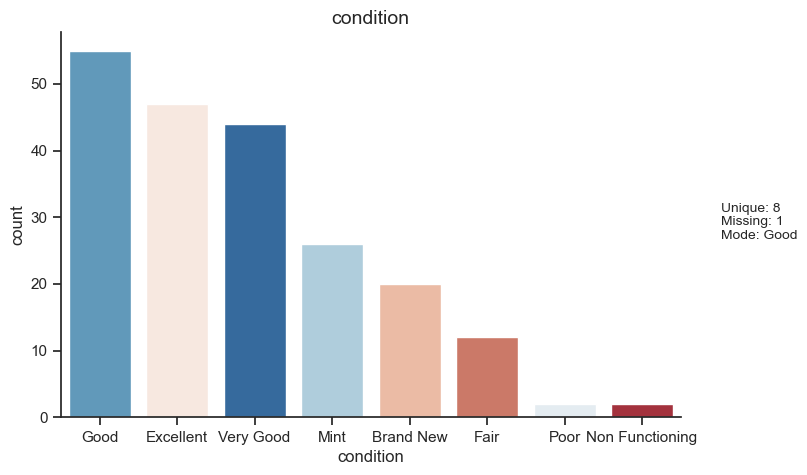

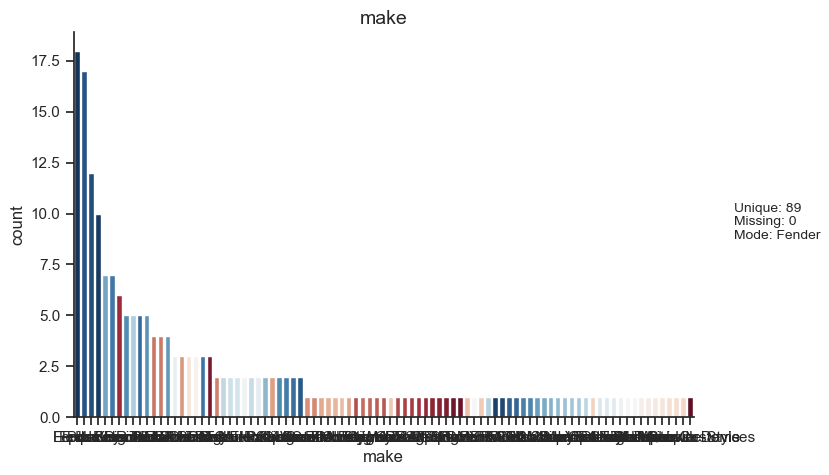

<Figure size 800x500 with 0 Axes>

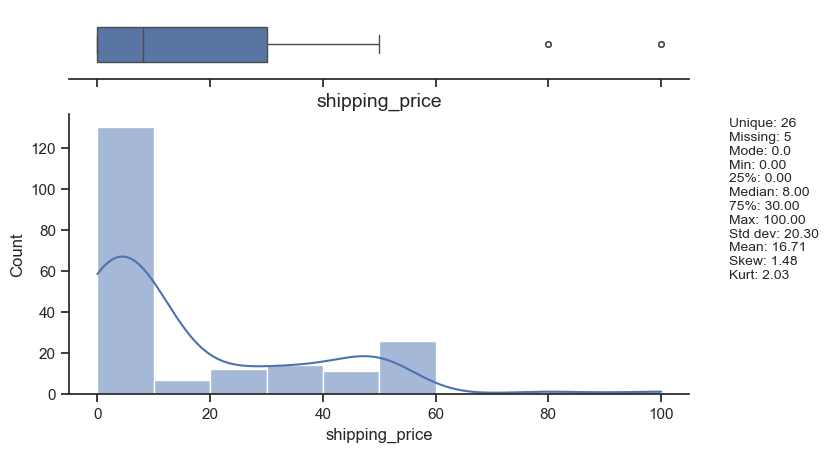

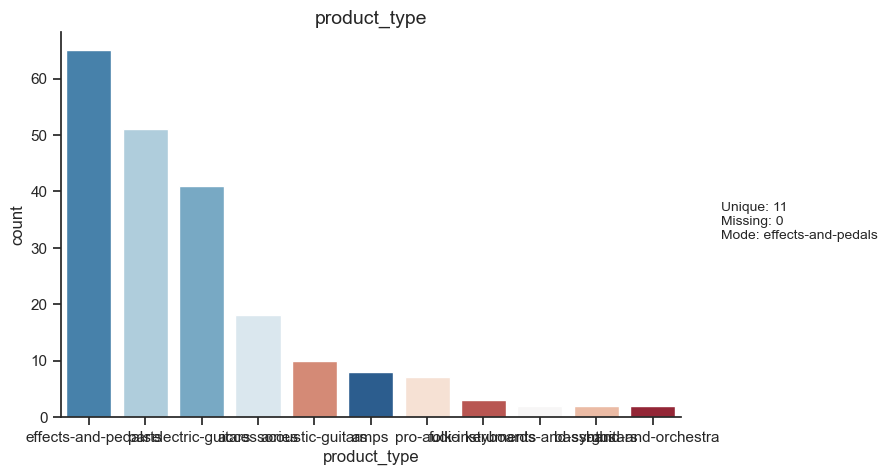

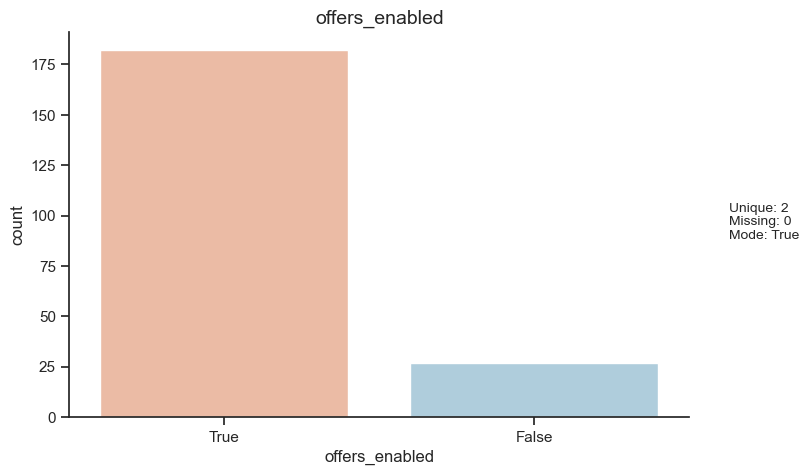

<Figure size 800x500 with 0 Axes>

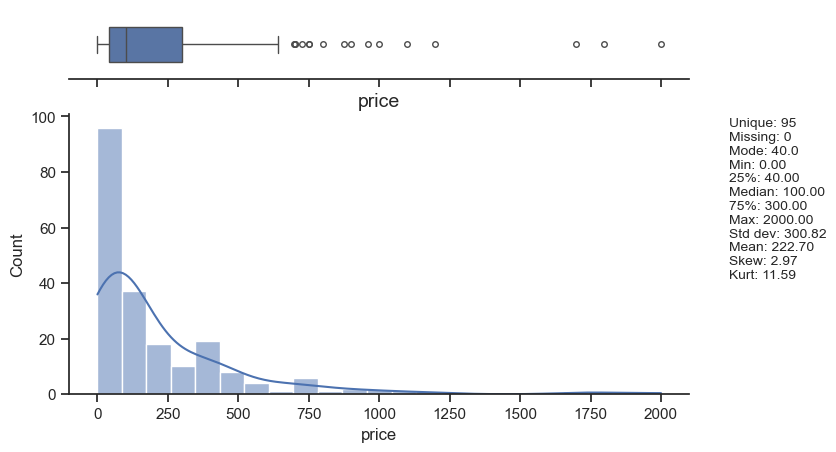

In [588]:
# call the univariate visualizations function
univariate_charts(df_small.drop(columns='description'))

These Visualizations Provide a Starting point for analysis by seeing data distribtuions for each variable. However, I will be customizing each visualization to provide optimal results for presenting the visuals as well.

## Bivariate Statistics: EDA

Define the bivariate_stats function to calculate for N2N, N2C/C2N, and C2C bivariate statistics for each feature in the dataset. In order to accurately run these bivariate statistics, I will now do some data cleaning to handle any missing values.

In [589]:
def bivariate_stats(df, label, roundto=4):
  import pandas as pd
  from scipy import stats

  output_df = pd.DataFrame(columns=['missing', 'p', 'r', 'y = m(x) + b', 'F', 'X2'])

  for feature in df.columns:
    if feature != label:
      df_temp = df[[feature, label]]
      df_temp = df_temp.dropna()
      missing = (df.shape[0] - df_temp.shape[0]) / df.shape[0]

      if pd.api.types.is_numeric_dtype(df_temp[feature]) and pd.api.types.is_numeric_dtype(df_temp[label]):
        m, b, r, p, err = stats.linregress(df_temp[feature], df_temp[label])
        output_df.loc[feature] = [f'{missing:.2%}', round(r, roundto), round(p, roundto), f'y = {round(m, roundto)}(x) + {round(b, roundto)}', '-', '-']

      elif not pd.api.types.is_numeric_dtype(df_temp[feature]) and not pd.api.types.is_numeric_dtype(df_temp[label]):
        contingency_table = pd.crosstab(df_temp[feature], df_temp[label]) # Calculate the crosstab
        X2, p, dof, expected = stats.chi2_contingency(contingency_table)  # Calculate the Chi-square based on the crosstab
        output_df.loc[feature] = [f'{missing:.2%}', round(p, roundto), '-', '-', '-', round(X2, roundto)]

      else:
        if pd.api.types.is_numeric_dtype(df_temp[feature]):
          num = feature
          cat = label
        else:
          num = label
          cat = feature

        groups = df_temp[cat].unique()
        group_lists = []
        for g in groups:
          g_list = df_temp[df_temp[cat] == g][num]
          group_lists.append(g_list)

        results = stats.f_oneway(*group_lists)
        F = results[0]
        p = results[1]
        output_df.loc[feature] = [f'{missing:.2%}', round(p, roundto), '-', '-', round(F, roundto), '-']
  return output_df.sort_values(by=['p'])

In [590]:
df_small.head()

,condition,make,shipping_price,product_type,offers_enabled,description,price
0,Very Good,Fender,45.0,amps,False,&nbsp;This is the Tweed version of the Fender ...,455.0
1,Good,Ibanez,6.5,effects-and-pedals,True,"Great condition, with one small ding on the si...",50.0
2,Very Good,Ibanez,8.0,effects-and-pedals,False,"Ibanez Prime Dual Chorus, model PC-10. Not a c...",70.0
3,Mint,Fender,30.0,electric-guitars,False,Fender Standard Tele. Its a 2014-2015 Model. L...,400.0
4,Good,Fender,15.0,parts,True,1990s Japanese Fender Strat body. It is matte ...,100.0


#### Handling Missing Values

In [591]:
# I will drop all missing values, since there are very few missing at random in only three columns.
df_small.dropna(inplace=True)
df_small.info()

<class 'pandas.core.frame.DataFrame'>
Index: 204 entries, 0 to 212
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   condition       204 non-null    object 
 1   make            204 non-null    object 
 2   shipping_price  204 non-null    float64
 3   product_type    204 non-null    object 
 4   offers_enabled  204 non-null    object 
 5   description     204 non-null    object 
 6   price           204 non-null    float64
dtypes: float64(2), object(5)
memory usage: 12.8+ KB


#### Run the Bivariate Statistics Automated Function to gather each bivariate statistic for the dataset.

In [592]:
bivariate_stats(df = df_small, label = 'price')

,missing,p,r,y = m(x) + b,F,X2
make,0.00%,0.0000,-,-,2.7631,-
product_type,0.00%,0.0000,-,-,23.041,-
condition,0.00%,0.0186,-,-,2.4752,-
offers_enabled,0.00%,0.0728,-,-,3.2533,-
shipping_price,0.00%,0.5328,0.0,y = 7.9426(x) + 95.1032,-,-
description,0.00%,NaN,-,-,NaN,-


The generates a pearson correlation (r) for the N2N relationships, a p-value (p), ANOVA test (F) for the C2N or N2C relationships, and the chi-square (X2) statistic for C2C relationships (of which there are none with the label, since the label is numeric).

## Bivariate Visualizations: EDA

Starting with Numeric-to-Numeric relationships, now it's to generate the scatterplot along with a regression line and statistics with the R2 value.

In [593]:
def scatterplot(df, feature, label, roundto=3, linecolor='darkorange'):
  import pandas as pd
  from matplotlib import pyplot as plt
  import seaborn as sns
  from scipy import stats

  # Create the plot
  sns.regplot(x=df[feature], y=df[label], line_kws={"color": linecolor})

  # Calculate the regression line so that we can print the text
  m, b, r, p, err = stats.linregress(df[feature], df[label])

  # Add all descriptive statistics to the diagram
  textstr  = 'Regression line:' + '\n'
  textstr += 'y  = ' + str(round(m, roundto)) + 'x + ' + str(round(b, roundto)) + '\n'
  textstr += 'r   = ' + str(round(r, roundto)) + '\n'
  textstr += 'r2 = ' + str(round(r**2, roundto)) + '\n'
  textstr += 'p  = ' + str(round(p, roundto)) + '\n\n'

  plt.text(1, 0.1, textstr, fontsize=12, transform=plt.gcf().transFigure)
  plt.show()

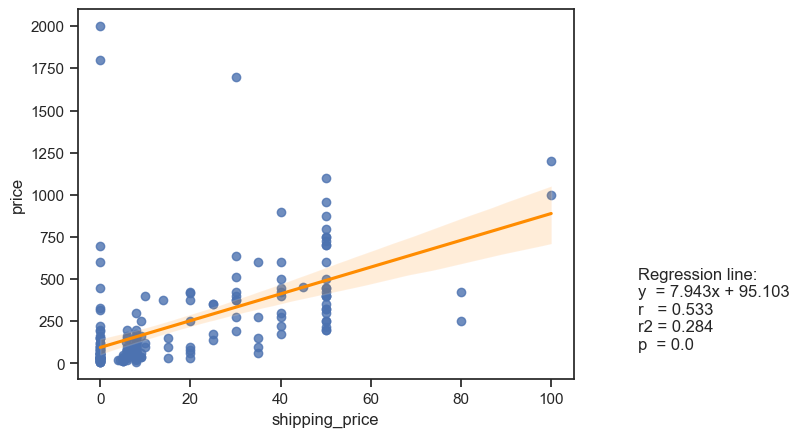

In [594]:
scatterplot(df_small, feature='shipping_price', label = 'price')

Define the bar_chart function to generate bar charts for the C2N and N2C Relationships. In this case, there is a C2N only generated, for each category within each feature and the label, price.

In [595]:
def bar_chart(df, feature, label, roundto=3):
        import pandas as pd
        from scipy import stats
        from matplotlib import pyplot as plt
        import seaborn as sns
        
        sns.barplot(df, x=feature, y=label)
        
        # Create the label lists needed to calculate oneway-ANOVA F  
        groups = df[feature].unique()
        group_lists = []
        for g in groups:
          g_list = df[df[feature] == g][label]
          group_lists.append(g_list)
      
        results = stats.f_oneway(*group_lists)
        F = results[0]
        p = results[1]
      
        # Next, calculate t-tests with Bonferroni correction for p-value threshold
        ttests = []
        for i1, g1 in enumerate(groups): # Use the enumerate() function to add an index for counting to a list of values
          # For each item, loop through a second list of each item to compare each pair
          for i2, g2 in enumerate(groups):
            if i2 > i1: # If the inner_index is greater that the outer_index, then go ahead and run a t-test
              type_1 = df[df[feature] == g1]
              type_2 = df[df[feature] == g2]
              t, p = stats.ttest_ind(type_1[label], type_2[label])
            
              # Add each t-test result to a list of t, p pairs
              ttests.append([str(g1) + ' - ' + str(g2), round(t, roundto), round(p, roundto)])
      
        p_threshold = 0.05 / len(ttests) # Bonferroni-corrected p-value determined
      
        # Add all descriptive statistics to the diagram
        textstr  = '   ANOVA' + '\n'
        textstr += 'F: ' + str(round(F, roundto)) + '\n'
        textstr += 'p: ' + str(round(p, roundto)) + '\n\n'
      
        # Only include the significant t-tests in the printed results for brevity
        for ttest in ttests:
          if ttest[2] <= p_threshold:
            if 'Sig. comparisons (Bonferroni-corrected)' not in textstr: # Only include the header if there is at least one significant result
              textstr += 'Sig. comparisons (Bonferroni-corrected)' + '\n'
            textstr += str(ttest[0]) + ": t=" + str(ttest[1]) + ", p=" + str(ttest[2]) + '\n'
      
        plt.text(1, 0.1, textstr, fontsize=12, transform=plt.gcf().transFigure)
        plt.xticks(rotation=90)
        plt.show()

The second bivariate visualization is a barplot showing each condition's relationship with price.

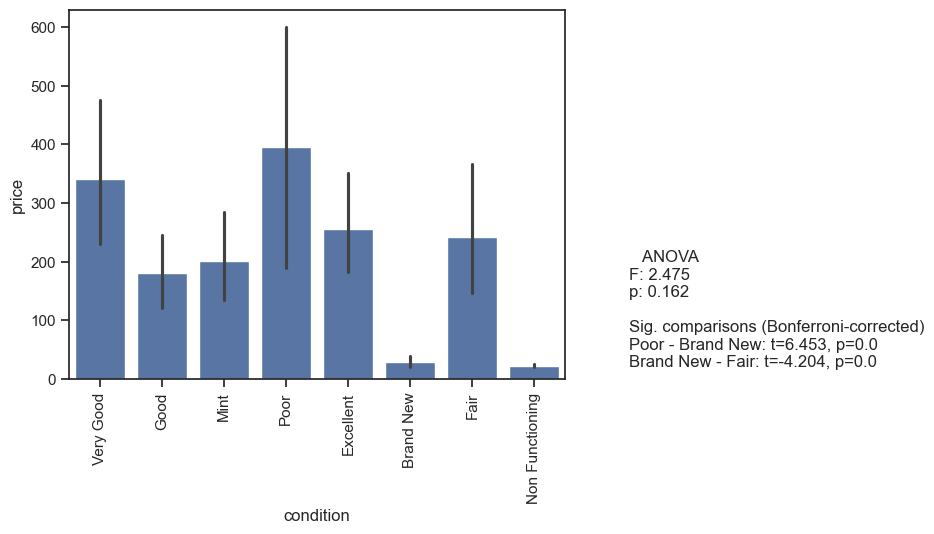

In [596]:
bar_chart(df=df_small, feature = 'condition', label = 'price')

The product type will look at each category of product and its type to determine if there is any category of product that will have a relationship with price that stands out.

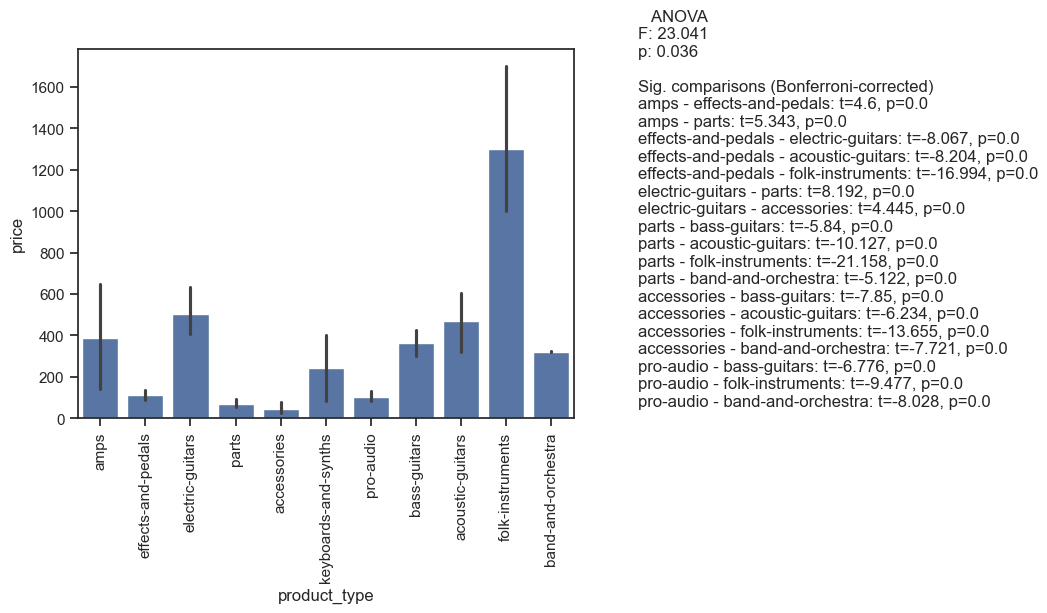

In [597]:
bar_chart(df=df_small, feature = 'product_type', label = 'price')

The next visualazion focuses on the boolean value with only 2 options: True or False for enabling offers for customers to offer on items.

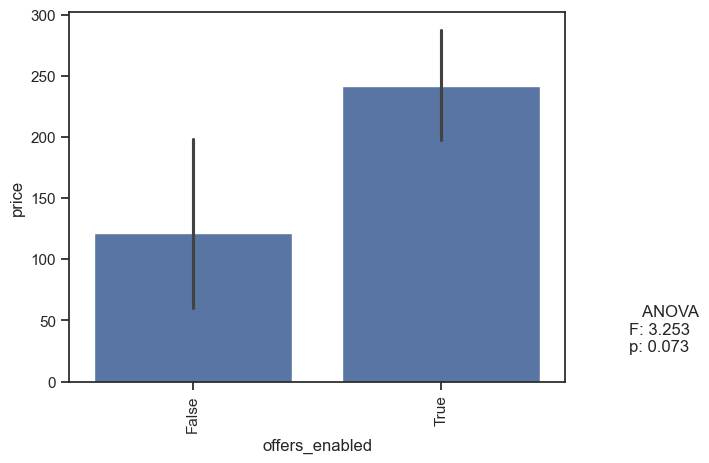

In [598]:
bar_chart(df=df_small, feature = 'offers_enabled', label = 'price')

The last bivariate visualization is the "Make" Category, but since there are so many unique values, I will focus on just a few.

#### Data Cleaning 3 - Binning Values

I need to bin the values that are outside of the main brands, all into an "other" category to be represented in the chart below. This allows me to use all of the data since there are so many brands listed.

In [599]:
df_small.make.unique()

array(['Fender', 'Ibanez', 'Erlwine', 'EVH', 'Epiphone', 'Boss', 'Alesis',
       'TASCAM', 'GoGo', 'Roland', 'Mogami', 'Peavey', 'Electro-Harmonix',
       'Gibson', 'TC Helicon', 'Hondo', 'Squier', 'Ernie Ball', 'Vox',
       'Schecter', 'Takamine', 'Jackson', 'Cort', 'Washburn', 'Radial',
       'Supro', 'Dunlop', 'Marshall', 'Baby Boom', 'DigiTech',
       'Switch Doctor', 'Crate', 'Charvel', 'TC Electronic', 'Rocktron',
       'Mako', 'Dean', 'Behringer', 'NuX', 'Hosa', 'ESP LTD', 'Taylor',
       'Line 6', 'CreamTone', 'MXR', 'Shure', 'Deering', 'Truetone',
       'Memphis', 'Jupiter', 'Unknown', 'Alvarez', 'Wampler',
       'Pine-Box Customs', 'EarthQuaker Devices', 'Yamaha', 'Dominator',
       'Olds', 'Pigtronix', 'Morley', 'Tech 21', 'Catalinbread',
       'Voodoo Lab', 'FGN Fujigen', 'Paloma', 'Shubb', 'Savona',
       'Crafter', 'Neko', 'DiMarzio', 'Seymour Duncan', 'Analogman',
       'Lund', 'Cepheus', 'Bare Knuckle', 'Crossrock', 'Way Huge', 'Taka',
       'ESP', "D'Adda

In [600]:
df_small.make.value_counts()

make
Fender                 18
Boss                   17
Epiphone               12
Ibanez                 10
Electro-Harmonix        7
                       ..
Unknown                 1
Wampler                 1
Pine-Box Customs        1
EarthQuaker Devices     1
Nashville-Style         1
Name: count, Length: 89, dtype: int64

In [601]:
df_proportions = pd.DataFrame({"Count":df_small['make'].value_counts()}) # get the number of values of each make into a dataframe
df_proportions['Proportion'] = df_proportions['Count'] / df_small.shape[0] # create a column in the DataFrame representing the proportion of the count of the make in comparison to 100%.
df_proportions

,Count,Proportion
make,,
Fender,18,0.088235
Boss,17,0.083333
Epiphone,12,0.058824
Ibanez,10,0.049020
Electro-Harmonix,7,0.034314
...,...,...
Unknown,1,0.004902
Wampler,1,0.004902
Pine-Box Customs,1,0.004902


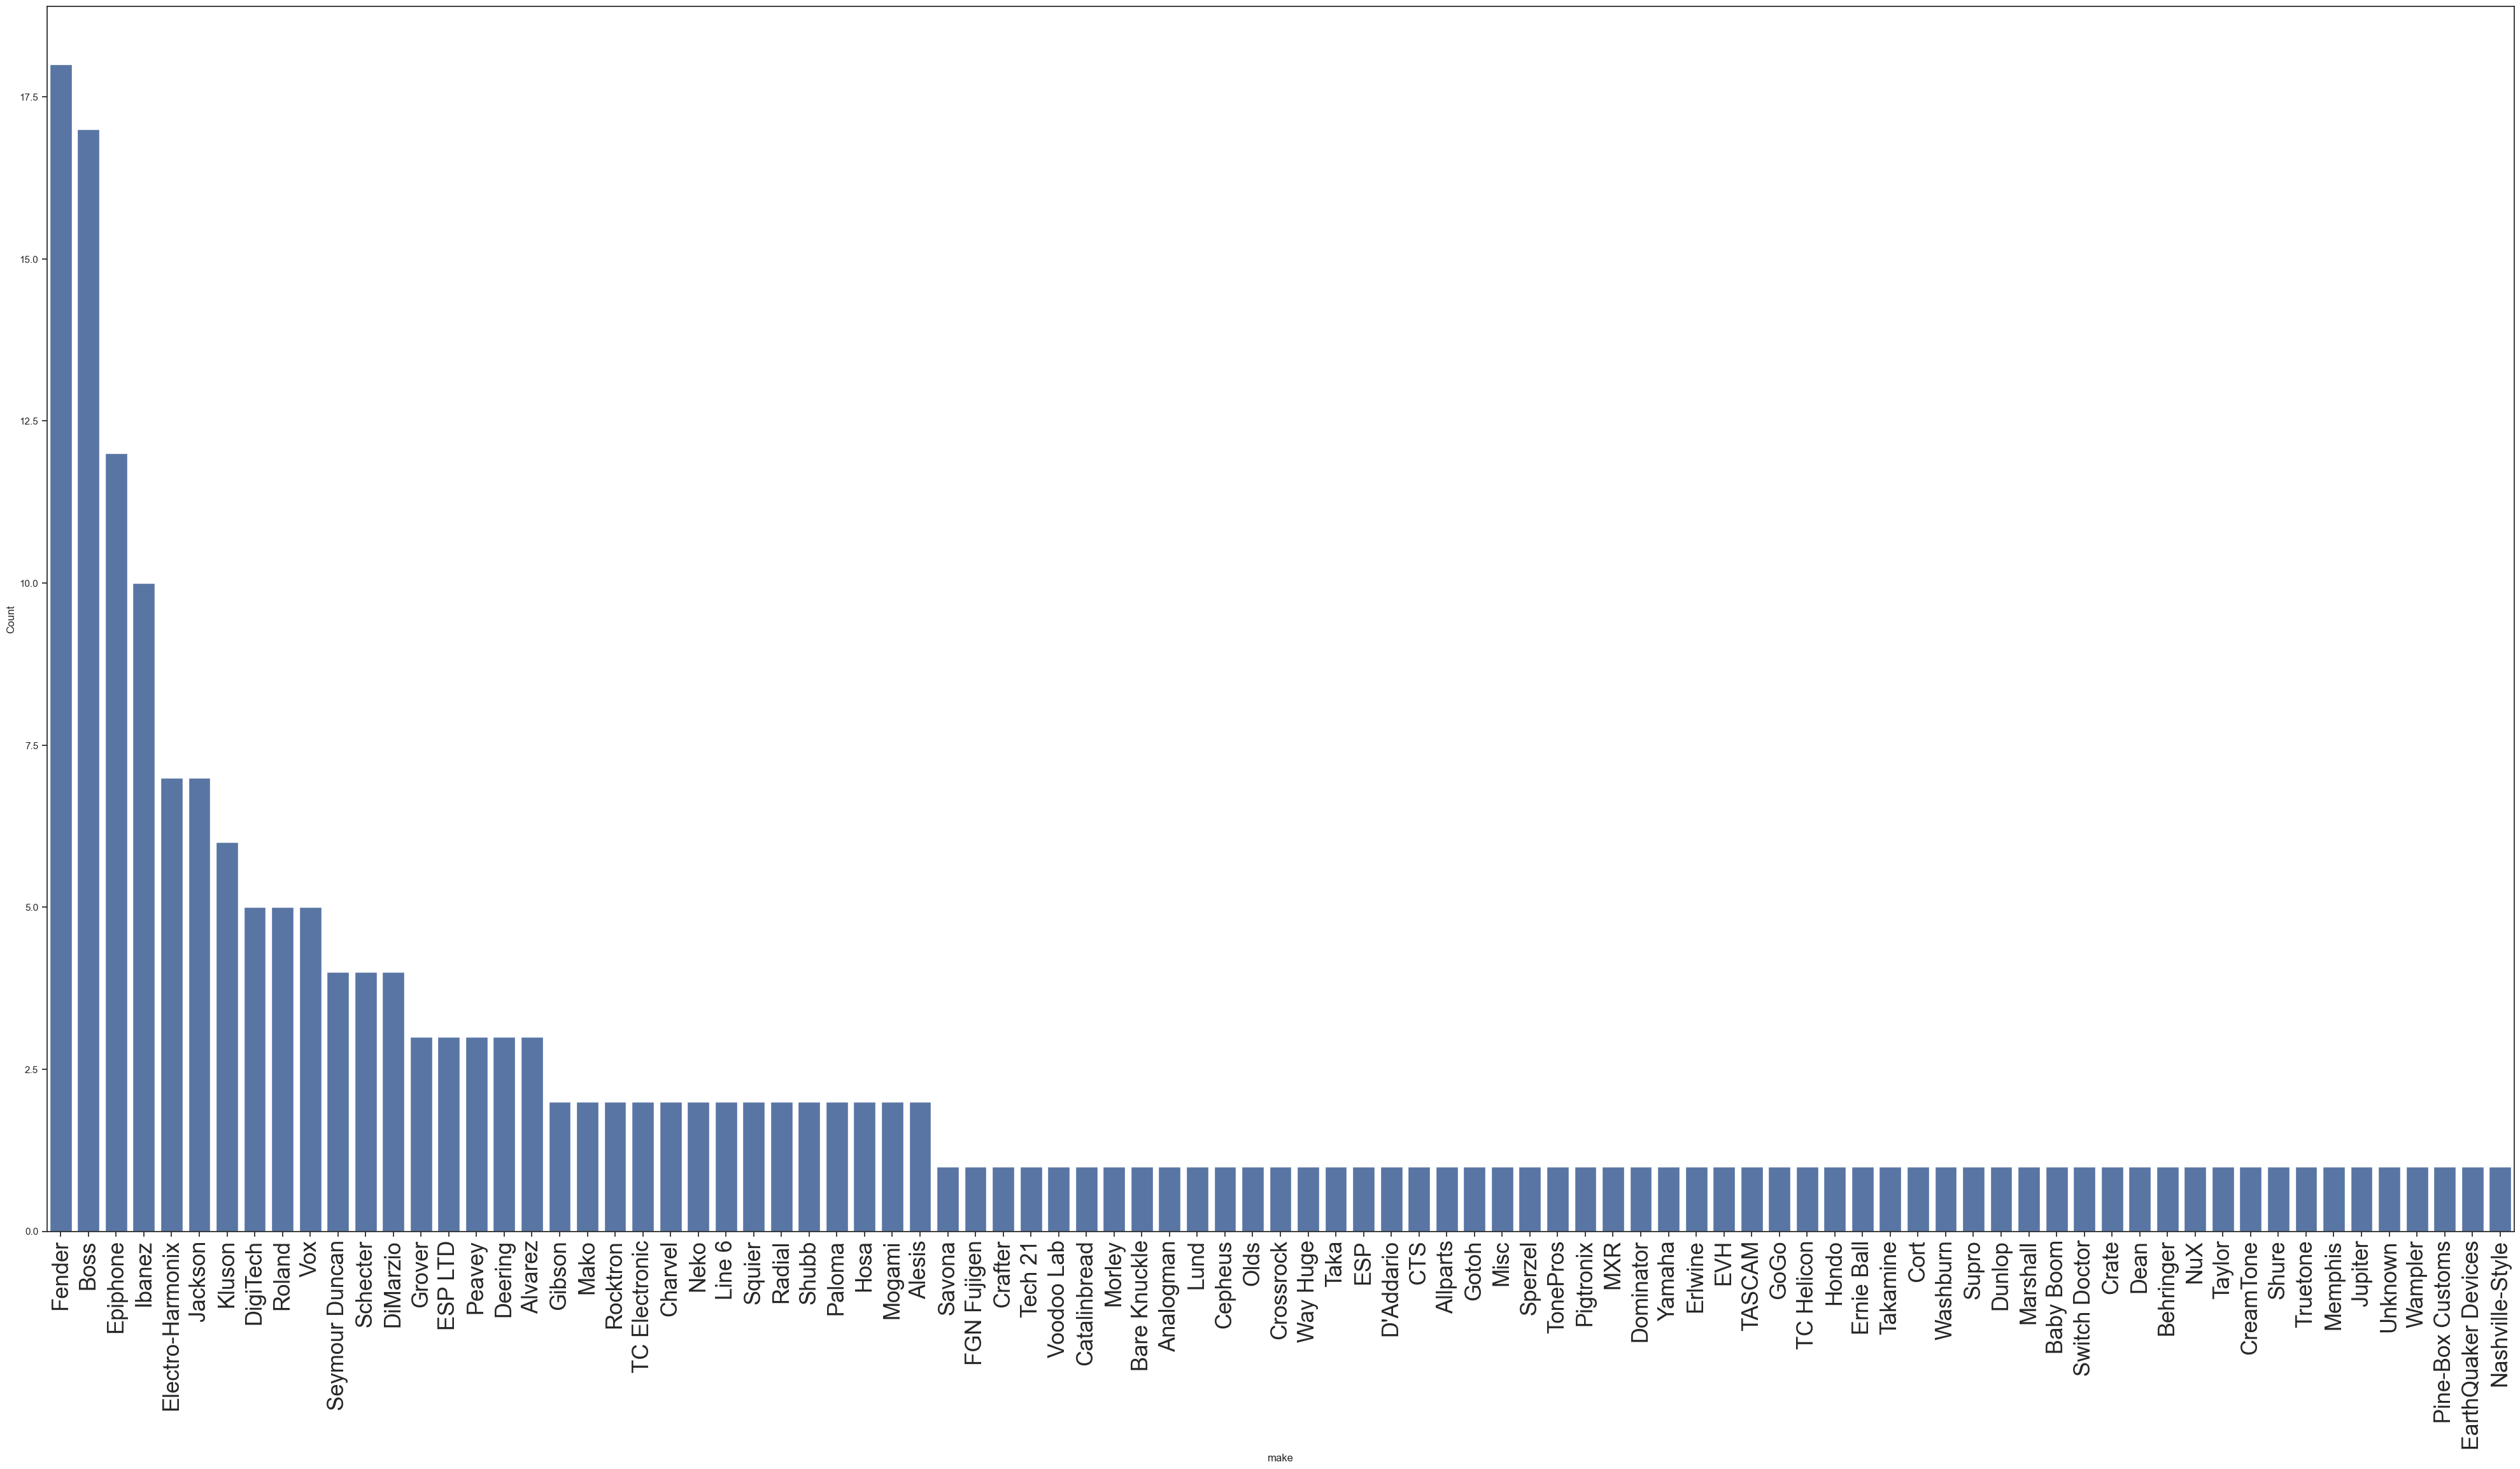

In [602]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(50, 25))
plt.xticks(rotation = 90, size = 25)
sns.barplot(x=df_proportions.index, y=df_proportions.Count);

In [603]:
other_list = []

# create a threshold of having just 1 post only or 2 posts only so that any make that is 1 unique value or with 2 postings will be binned in "other"
for make in df_proportions.itertuples():
    if make.Count == 1:
        other_list.append(make[0])
    elif make.Count == 2:
        other_list.append(make[0]) 

for c in other_list:
    print(f'{c}, ', end='')


Gibson, Mako, Rocktron, TC Electronic, Charvel, Neko, Line 6, Squier, Radial, Shubb, Paloma, Hosa, Mogami, Alesis, Savona, FGN Fujigen, Crafter, Tech 21, Voodoo Lab, Catalinbread, Morley, Bare Knuckle, Analogman, Lund, Cepheus, Olds, Crossrock, Way Huge, Taka, ESP, D'Addario, CTS, Allparts, Gotoh, Misc, Sperzel, TonePros, Pigtronix, MXR, Dominator, Yamaha, Erlwine, EVH, TASCAM, GoGo, TC Helicon, Hondo, Ernie Ball, Takamine, Cort, Washburn, Supro, Dunlop, Marshall, Baby Boom, Switch Doctor, Crate, Dean, Behringer, NuX, Taylor, CreamTone, Shure, Truetone, Memphis, Jupiter, Unknown, Wampler, Pine-Box Customs, EarthQuaker Devices, Nashville-Style, 

Now that each value that is going to be binned into the "other" make column is identified, which are just those that only have 1 post as a make or 2 posts as a make (so it's a completely unique brand/make or only has 2 postings with the same brand/make), it's time to replace that brand/make name with the term "Other" in the df_small DataFrame.

In [604]:
for make in other_list:
    df_small['make'].replace(make, 'Other', inplace=True)

# preview only the 'make' column
df_small['make']

0      Fender
1      Ibanez
2      Ibanez
3      Fender
4      Fender
        ...  
208    Grover
209     Other
210     Other
211     Other
212    Fender
Name: make, Length: 204, dtype: object

In [605]:
df_proportions = pd.DataFrame({"Count":df_small['make'].value_counts()}) # get the number of values of each make into a dataframe
df_proportions['Proportion'] = df_proportions['Count'] / df_small.shape[0] # create a column in the DataFrame representing the proportion of the count of the make in comparison to 100%.
df_proportions



,Count,Proportion
make,,
Other,85,0.416667
Fender,18,0.088235
Boss,17,0.083333
Epiphone,12,0.058824
Ibanez,10,0.049020
Electro-Harmonix,7,0.034314
Jackson,7,0.034314
Kluson,6,0.029412
Roland,5,0.024510


In [606]:
# choosing the brands expected to be most common and have effect on price.
makes_to_keep = ['Fender', 'Ibanez', 'Epiphone', 'Electro-Harmonix', 'Boss', 'Jackson', 'Kluson', 'Roland', 'Vox', 'Digitech', 
                 'DiMarzio', 'Seymour Duncan', 'Schecter', 'Alvarez', 'Deering', 'ESP LTD', 'Peavey', 
                 'Grover',  'Other'] 

# Filter rows
filtered_df = df_small[df_small['make'].isin(makes_to_keep)]



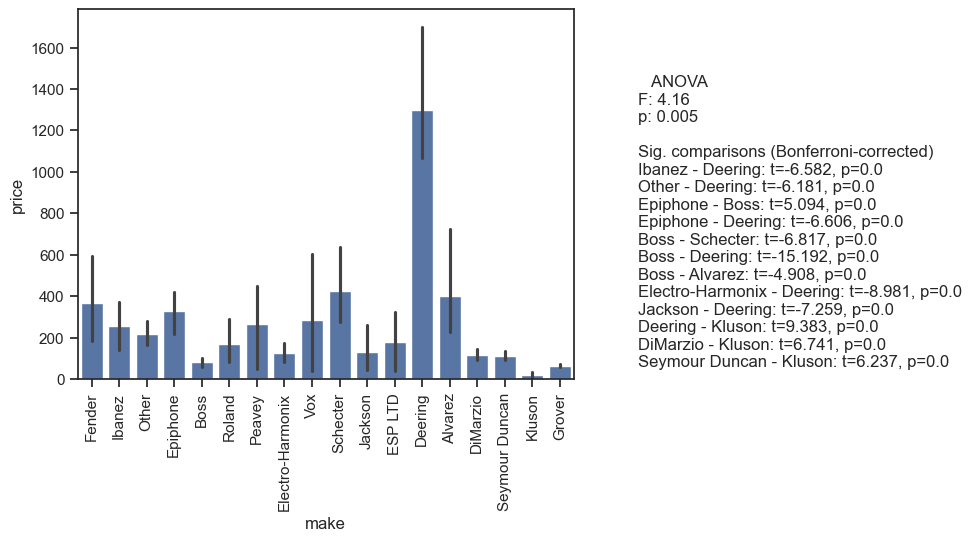

In [607]:
bar_chart(df = filtered_df, feature = 'make', label = 'price')

## Data Cleaning

Data Cleaning Step 1 - all missing values have already been removed

Data Cleaning Step 2 - previouly, duplicate columns with the same exact descripton verbatim were removed, as these represented duplicate posts.

Data Cleaning Step 3 - Binning values in the 'make' column to include any make that only had one listing or two listings as "Other"

Data Cleaning Step 4 - dealing with outliers.

In [608]:
filtered_df.head(20)

,condition,make,shipping_price,product_type,offers_enabled,description,price
0,Very Good,Fender,45.00,amps,False,&nbsp;This is the Tweed version of the Fender ...,455.00
1,Good,Ibanez,6.50,effects-and-pedals,True,"Great condition, with one small ding on the si...",50.00
2,Very Good,Ibanez,8.00,effects-and-pedals,False,"Ibanez Prime Dual Chorus, model PC-10. Not a c...",70.00
3,Mint,Fender,30.00,electric-guitars,False,Fender Standard Tele. Its a 2014-2015 Model. L...,400.00
4,Good,Fender,15.00,parts,True,1990s Japanese Fender Strat body. It is matte ...,100.00
5,Good,Fender,0.00,effects-and-pedals,False,Fender PT-10 Guitar Pedal. This is a simple tu...,30.00
6,Poor,Other,30.00,electric-guitars,True,Here we have a guitar with an interesting hist...,190.00
7,Mint,Other,20.00,electric-guitars,True,EVH Wolfgang-T Standard. I have a Roadrunner ...,375.00
8,Excellent,Epiphone,20.00,electric-guitars,True,Epiphone Les Paul Custom Pro in Alpine White a...,420.00
9,Mint,Boss,9.00,effects-and-pedals,True,<p><strong>BOSS GT-1 Guitar Multi-Effects Proc...,165.00


In [609]:
# Shipping price has a few large outliers. It also has skewness and kurtosis. Shipping Price is right-skewed. Additionally,to help the model predict the relationship between shipping_price and price, the top outliers will be removed. 

# Removing outliers
# the first option is the empirical rule, the 2nd is the Tukey BoxPlot, and the third option is using the boxplot.
# in the boxplot, there are two major outliers.
# The Z-score signifies how far a point is from the mean (measured in standard deviations). Points with Z-score above 3 or below -3 are often flagged as outliers (Priya, 2025). Also according to Priya,
# Z-scores does not work well with non-normally distributed data or those with heavy tails (like 'shipping_price' in this dataset)
# Priya, B. (2025, January 9). Top 5 Statistical techniques to Detect and handle outliers in data. Statology. https://www.statology.org/top-5-statistical-techniques-detect-handle-outliers-data/

# Tukey Box-Plot Method
import numpy as np

column = 'shipping_price'

Q1 = filtered_df[column].quantile(0.25)
Q3 = filtered_df[column].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
df_filtered = filtered_df[(filtered_df[column] >= lower_bound) & (filtered_df[column] <= upper_bound)]
print(f'Shape of filtered_df with outliers: {filtered_df.shape}')
print(f'Shape of filtered_df without outliers: {df_filtered.shape}')


Shape of filtered_df with outliers: (199, 7)
Shape of filtered_df without outliers: (195, 7)


Data Cleaning Step 5: Mathematical Transformations to Correct Skewness & Kurtosis in shipping_price

In [610]:
# shipping_price has mild skewness, positive (right), so I will use a square root transformation
df_filtered['shipping_price'] = np.sqrt(df_filtered['shipping_price'])
unistats(df_filtered)

,Count,Unique,Type,Min,Max,25%,50%,75%,Mean,Median,Mode,Std,Skew,Kurt
condition,195,8,object,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
make,195,18,object,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
shipping_price,195,24,float64,0.0,7.07,0.0,2.83,5.48,3.03,2.83,0.0,2.51,0.27,-1.18
product_type,195,11,object,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
offers_enabled,195,2,object,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
description,195,195,object,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
price,195,91,float64,7.25,2000.0,50.0,100.0,310.0,222.46,100.0,40.0,294.6,3.12,13.14


Data Cleaning Step 6: Correcting Skewness in price

In [611]:
# since price has a larger postive right skew, I will use a cube root transformation
df_filtered['price'] = np.cbrt(df_filtered['price'])
unistats(df_filtered)

,Count,Unique,Type,Min,Max,25%,50%,75%,Mean,Median,Mode,Std,Skew,Kurt
condition,195,8,object,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
make,195,18,object,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
shipping_price,195,24,float64,0.0,7.07,0.0,2.83,5.48,3.03,2.83,0.0,2.51,0.27,-1.18
product_type,195,11,object,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
offers_enabled,195,2,object,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
description,195,195,object,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
price,195,91,float64,1.94,12.6,3.68,4.64,6.77,5.25,4.64,3.42,2.11,0.88,0.56


Data Cleaning Step 7: Natural Language Processing - Dealing with the text data to make it useable.

## Natural Language Processing

In [612]:
df2 = df_filtered.copy()

In [613]:
df2.head()

,condition,make,shipping_price,product_type,offers_enabled,description,price
0,Very Good,Fender,6.708204,amps,False,&nbsp;This is the Tweed version of the Fender ...,7.691372
1,Good,Ibanez,2.549510,effects-and-pedals,True,"Great condition, with one small ding on the si...",3.684031
2,Very Good,Ibanez,2.828427,effects-and-pedals,False,"Ibanez Prime Dual Chorus, model PC-10. Not a c...",4.121285
3,Mint,Fender,5.477226,electric-guitars,False,Fender Standard Tele. Its a 2014-2015 Model. L...,7.368063
4,Good,Fender,3.872983,parts,True,1990s Japanese Fender Strat body. It is matte ...,4.641589


In [614]:
import spacy # import the required modules/libraries for Natural Language Processing
import pandas as pd

nlp = spacy.load("en_core_web_sm")

# create the nlp processing function
nlp = spacy.load("en_core_web_sm")

# apply nlp to the description column to tokenize each document (row of the description column) and create a new tokenized column.
df_filtered['Tokenized'] = df_filtered['description'].apply(lambda x: nlp(x))


In [615]:
df_filtered.head(5)

,condition,make,shipping_price,product_type,offers_enabled,description,price,Tokenized
0,Very Good,Fender,6.708204,amps,False,&nbsp;This is the Tweed version of the Fender ...,7.691372,"(&, nbsp;This, is, the, Tweed, version, of, th..."
1,Good,Ibanez,2.549510,effects-and-pedals,True,"Great condition, with one small ding on the si...",3.684031,"(Great, condition, ,, with, one, small, ding, ..."
2,Very Good,Ibanez,2.828427,effects-and-pedals,False,"Ibanez Prime Dual Chorus, model PC-10. Not a c...",4.121285,"(Ibanez, Prime, Dual, Chorus, ,, model, PC-10,..."
3,Mint,Fender,5.477226,electric-guitars,False,Fender Standard Tele. Its a 2014-2015 Model. L...,7.368063,"(Fender, Standard, Tele, ., Its, a, 2014, -, 2..."
4,Good,Fender,3.872983,parts,True,1990s Japanese Fender Strat body. It is matte ...,4.641589,"(1990s, Japanese, Fender, Strat, body, ., It, ..."


In [616]:
# Make a function to remove stop words and puncuation
def clean_text(tokenized_doc):
  collection = [] # Create a list of fragments to keep
  for token in tokenized_doc:
    if not token.is_stop and token.pos_ != 'PUNCT': # removes stop words and punctuations.
      collection.append(token.lemma_) # Add the lemmatized version of the word
  return tuple(collection)

# Make a function to count up a given part of speech
def count_pos(tokenized_doc, pos):
  count = 0
  for token in tokenized_doc:
    if token.pos_ == pos:
      count += 1
  return count

nlp = spacy.load("en_core_web_sm")
df_filtered['Tokenized'] = df_filtered['description'].apply(lambda x: clean_text(nlp(x)))
df_filtered['Nouns'] = df_filtered['description'].apply(lambda x: count_pos(nlp(x), 'NOUN'))
df_filtered['Verbs'] = df_filtered['description'].apply(lambda x: count_pos(nlp(x), 'VERB'))
df_filtered['Adjectives'] = df_filtered['description'].apply(lambda x: count_pos(nlp(x), 'ADJ'))
df_filtered['Numbers'] = df_filtered['description'].apply(lambda x: count_pos(nlp(x), 'NUM'))
df_filtered['Pronouns'] = df_filtered['description'].apply(lambda x: count_pos(nlp(x), 'PRON'))
df_filtered['Proper'] = df_filtered['description'].apply(lambda x: count_pos(nlp(x), 'PROPN'))

df_filtered.head(10)

,condition,make,shipping_price,product_type,offers_enabled,description,price,Tokenized,Nouns,Verbs,Adjectives,Numbers,Pronouns,Proper
0,Very Good,Fender,6.708204,amps,False,&nbsp;This is the Tweed version of the Fender ...,7.691372,"(&, nbsp;this, Tweed, version, Fender, Blues, ...",30,17,17,6,10,17
1,Good,Ibanez,2.549510,effects-and-pedals,True,"Great condition, with one small ding on the si...",3.684031,"(great, condition, small, ding, little, dust, ...",25,6,10,1,1,4
2,Very Good,Ibanez,2.828427,effects-and-pedals,False,"Ibanez Prime Dual Chorus, model PC-10. Not a c...",4.121285,"(Ibanez, Prime, Dual, Chorus, model, pc-10, co...",18,6,3,3,3,15
3,Mint,Fender,5.477226,electric-guitars,False,Fender Standard Tele. Its a 2014-2015 Model. L...,7.368063,"(Fender, Standard, Tele, 2014, -, 2015, Model,...",35,19,19,9,19,21
4,Good,Fender,3.872983,parts,True,1990s Japanese Fender Strat body. It is matte ...,4.641589,"(1990, Japanese, Fender, Strat, body, matte, b...",33,21,17,2,24,12
5,Good,Fender,0.000000,effects-and-pedals,False,Fender PT-10 Guitar Pedal. This is a simple tu...,3.107233,"(fender, pt-10, Guitar, Pedal, simple, tuner, ...",25,10,6,4,10,6
6,Poor,Other,5.477226,electric-guitars,True,Here we have a guitar with an interesting hist...,5.748897,"(guitar, interesting, history, Erlwine, Laser,...",77,32,31,4,28,17
7,Mint,Other,4.472136,electric-guitars,True,EVH Wolfgang-T Standard. I have a Roadrunner ...,7.211248,"( , EVH, Wolfgang, T, Standard, Roadrunner, Ha...",53,13,22,5,5,24
8,Excellent,Epiphone,4.472136,electric-guitars,True,Epiphone Les Paul Custom Pro in Alpine White a...,7.488872,"(Epiphone, Les, Paul, Custom, Pro, Alpine, Whi...",1,0,0,0,0,10
9,Mint,Boss,3.000000,effects-and-pedals,True,<p><strong>BOSS GT-1 Guitar Multi-Effects Proc...,5.484807,"(<, p><strong, >, boss, GT-1, Guitar, Multi, -...",83,26,38,1,8,36


Now, adding not just the part of speech, but also named Entity recognition using the spacy package, which creates features to predict on to improve the model.

In [617]:
# Make a function to count up a given part of speech
def count_entities(tokenized_doc, ne):
  count = 0
  for token in tokenized_doc.ents:
    if token.label_ == ne:
      count += 1
  return count

# I am only going to include entities that should be relevant to the domain area.
df_filtered['People'] = df_filtered['description'].apply(lambda x: count_entities(nlp(x), 'PERSON'))
df_filtered['Organizations'] = df_filtered['description'].apply(lambda x: count_entities(nlp(x), 'ORG'))
df_filtered['Locations'] = df_filtered['description'].apply(lambda x: count_entities(nlp(x), 'GPE'))
df_filtered['Countries_Cities_States'] = df_filtered['description'].apply(lambda x: count_entities(nlp(x), 'GPE'))
df_filtered['Nationalities_or_Religious_Political_Groups'] = df_filtered['description'].apply(lambda x: count_entities(nlp(x), 'NORP'))
df_filtered['Facilities'] = df_filtered['description'].apply(lambda x: count_entities(nlp(x), 'FAC'))
df_filtered['Locations_Non_GPE'] = df_filtered['description'].apply(lambda x: count_entities(nlp(x), 'LOC'))
df_filtered['Products'] = df_filtered['description'].apply(lambda x: count_entities(nlp(x), 'PRODUCT'))
df_filtered['Events'] = df_filtered['description'].apply(lambda x: count_entities(nlp(x), 'EVENT'))
df_filtered['Dates'] = df_filtered['description'].apply(lambda x: count_entities(nlp(x), 'DATE'))
df_filtered['Monetary_Values'] = df_filtered['description'].apply(lambda x: count_entities(nlp(x), 'MONEY'))
df_filtered['Quantities'] = df_filtered['description'].apply(lambda x: count_entities(nlp(x), 'QUANTITY'))


In [618]:
df_filtered.head(10)

,condition,make,shipping_price,product_type,offers_enabled,description,price,Tokenized,Nouns,Verbs,...,Locations,Countries_Cities_States,Nationalities_or_Religious_Political_Groups,Facilities,Locations_Non_GPE,Products,Events,Dates,Monetary_Values,Quantities
0,Very Good,Fender,6.708204,amps,False,&nbsp;This is the Tweed version of the Fender ...,7.691372,"(&, nbsp;this, Tweed, version, Fender, Blues, ...",30,17,...,2,2,0,0,0,0,0,1,0,0
1,Good,Ibanez,2.549510,effects-and-pedals,True,"Great condition, with one small ding on the si...",3.684031,"(great, condition, small, ding, little, dust, ...",25,6,...,1,1,0,0,0,1,0,1,0,0
2,Very Good,Ibanez,2.828427,effects-and-pedals,False,"Ibanez Prime Dual Chorus, model PC-10. Not a c...",4.121285,"(Ibanez, Prime, Dual, Chorus, model, pc-10, co...",18,6,...,1,1,0,0,0,0,0,0,0,0
3,Mint,Fender,5.477226,electric-guitars,False,Fender Standard Tele. Its a 2014-2015 Model. L...,7.368063,"(Fender, Standard, Tele, 2014, -, 2015, Model,...",35,19,...,1,1,0,1,0,0,0,1,1,1
4,Good,Fender,3.872983,parts,True,1990s Japanese Fender Strat body. It is matte ...,4.641589,"(1990, Japanese, Fender, Strat, body, matte, b...",33,21,...,0,0,2,0,0,0,0,3,0,0
5,Good,Fender,0.000000,effects-and-pedals,False,Fender PT-10 Guitar Pedal. This is a simple tu...,3.107233,"(fender, pt-10, Guitar, Pedal, simple, tuner, ...",25,10,...,0,0,0,0,0,0,0,0,0,0
6,Poor,Other,5.477226,electric-guitars,True,Here we have a guitar with an interesting hist...,5.748897,"(guitar, interesting, history, Erlwine, Laser,...",77,32,...,4,4,1,0,0,1,0,1,0,0
7,Mint,Other,4.472136,electric-guitars,True,EVH Wolfgang-T Standard. I have a Roadrunner ...,7.211248,"( , EVH, Wolfgang, T, Standard, Roadrunner, Ha...",53,13,...,0,0,0,1,0,0,0,0,1,0
8,Excellent,Epiphone,4.472136,electric-guitars,True,Epiphone Les Paul Custom Pro in Alpine White a...,7.488872,"(Epiphone, Les, Paul, Custom, Pro, Alpine, Whi...",1,0,...,0,0,0,0,0,0,0,0,0,0
9,Mint,Boss,3.000000,effects-and-pedals,True,<p><strong>BOSS GT-1 Guitar Multi-Effects Proc...,5.484807,"(<, p><strong, >, boss, GT-1, Guitar, Multi, -...",83,26,...,0,0,0,1,1,0,0,0,0,0


## Predictive Modeling: 
You should build both a linear model (e.g. MLR, or variant) and a decision tree model (e.g. basic decision tree, random forest, gradient boosted tree) and compare the model fit. In summary:

If your label is numeric: build an MLR model and Decision Tree model to predict the label from all other features. Compare the R2, MAE, and RMSE for both models and mark which model you recommend using for future predictions.

I need to convert all of the categorical features into dummy variables for MLR.

## Multiple Linear Regression MLR Model: Predictive Analytics

In [642]:
df_mlr = df_filtered.copy()

In [643]:
import statsmodels.api as sm

In [644]:
# drop the description and Tokenized columns since the features have been extracted.
df_mlr.drop(columns = ['description', 'Tokenized'], inplace=True)

In [645]:
# Go through the columns and dummy code them one-at-a-time if they are not numeric
df_mlr = pd.get_dummies(df_mlr, columns=['condition', 'make', 'product_type', 'offers_enabled'], dtype = 'int', drop_first=True)
df_mlr.head()

,shipping_price,price,Nouns,Verbs,Adjectives,Numbers,Pronouns,Proper,People,Organizations,...,product_type_amps,product_type_band-and-orchestra,product_type_bass-guitars,product_type_effects-and-pedals,product_type_electric-guitars,product_type_folk-instruments,product_type_keyboards-and-synths,product_type_parts,product_type_pro-audio,offers_enabled_True
0,6.708204,7.691372,30,17,17,6,10,17,3,4,...,1,0,0,0,0,0,0,0,0,0
1,2.549510,3.684031,25,6,10,1,1,4,1,1,...,0,0,0,1,0,0,0,0,0,1
2,2.828427,4.121285,18,6,3,3,3,15,1,0,...,0,0,0,1,0,0,0,0,0,0
3,5.477226,7.368063,35,19,19,9,19,21,1,5,...,0,0,0,0,1,0,0,0,0,0
4,3.872983,4.641589,33,21,17,2,24,12,4,1,...,0,0,0,0,0,0,0,1,0,1


In [648]:
# Create an MLR model

# Set label and features
y = df_mlr['price']
X = df_mlr.select_dtypes(np.number).assign(const=1)
X = X.drop(columns=['price'])
X.head()  # Show first 5 rows of X in order to see what we have created

,shipping_price,Nouns,Verbs,Adjectives,Numbers,Pronouns,Proper,People,Organizations,Locations,...,product_type_band-and-orchestra,product_type_bass-guitars,product_type_effects-and-pedals,product_type_electric-guitars,product_type_folk-instruments,product_type_keyboards-and-synths,product_type_parts,product_type_pro-audio,offers_enabled_True,const
0,6.708204,30,17,17,6,10,17,3,4,2,...,0,0,0,0,0,0,0,0,0,1
1,2.549510,25,6,10,1,1,4,1,1,1,...,0,0,1,0,0,0,0,0,1,1
2,2.828427,18,6,3,3,3,15,1,0,1,...,0,0,1,0,0,0,0,0,0,1
3,5.477226,35,19,19,9,19,21,1,5,1,...,0,0,0,1,0,0,0,0,0,1
4,3.872983,33,21,17,2,24,12,4,1,0,...,0,0,0,0,0,0,1,0,1,1


In [649]:
# Run the multiple linear regression model
model = sm.OLS(y, X).fit()
print(model.summary())  # View results

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.664
Method:                 Least Squares   F-statistic:                     8.378
Date:                Wed, 05 Feb 2025   Prob (F-statistic):           3.97e-24
Time:                        19:12:30   Log-Likelihood:                -285.07
No. Observations:                 195   AIC:                             676.1
Df Residuals:                     142   BIC:                             849.6
Df Model:                          52                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

Now to Create an MLR Model with Min-Max Normalization to look at the effect of feature importance using the coefficients.

In [681]:
from sklearn import preprocessing

# Min-Max Normalization
df_minmax = pd.DataFrame(preprocessing.MinMaxScaler().fit_transform(df_mlr), columns=df_mlr.columns)
df_minmax.head()

,shipping_price,price,Nouns,Verbs,Adjectives,Numbers,Pronouns,Proper,People,Organizations,...,product_type_amps,product_type_band-and-orchestra,product_type_bass-guitars,product_type_effects-and-pedals,product_type_electric-guitars,product_type_folk-instruments,product_type_keyboards-and-synths,product_type_parts,product_type_pro-audio,offers_enabled_True
0,0.948683,0.539765,0.312500,0.447368,0.386364,0.333333,0.357143,0.127820,0.250000,0.307692,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.360555,0.163975,0.260417,0.157895,0.227273,0.055556,0.035714,0.030075,0.083333,0.076923,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.400000,0.204979,0.187500,0.157895,0.068182,0.166667,0.107143,0.112782,0.083333,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.774597,0.509447,0.364583,0.500000,0.431818,0.500000,0.678571,0.157895,0.083333,0.384615,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.547723,0.253770,0.343750,0.552632,0.386364,0.111111,0.857143,0.090226,0.333333,0.076923,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [682]:
y = df_minmax.price
X = df_minmax.drop(columns=['price']).assign(const=1)

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.664
Method:                 Least Squares   F-statistic:                     8.378
Date:                Wed, 05 Feb 2025   Prob (F-statistic):           3.97e-24
Time:                        19:33:24   Log-Likelihood:                 176.46
No. Observations:                 195   AIC:                            -246.9
Df Residuals:                     142   BIC:                            -73.45
Df Model:                          52                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

In [683]:
def vif(data):
  # Testing for multicollinearity
  import statsmodels.api as sm

  # Create a blank DataFrame to store the results
  df_vif = pd.DataFrame(columns=['VIF'])

  # Loop through the X features only to generate VIF score for each
  for col in df_minmax.drop(columns=['price']):
    y = df_minmax[col] # Each X feature takes a turn being the y
    # All remaining X features are used to predict that y
    X = df_minmax.drop(columns=[col, 'price']).assign(const=1)

    r_squared = sm.OLS(y, X).fit().rsquared # Record the R squared from the model
    df_vif.loc[col] = [1/(1 - r_squared)]

  # Print out the list of VIF scores sorted from highest (worst) to lowest (best)
  df_vif.sort_values(by=['VIF'], ascending=False, inplace=True)
  return df_vif.head(10)

In [684]:
df_minmax.drop(columns = ['Locations', 'make_Deering', 'product_type_folk-instruments', 'Countries_Cities_States'], inplace=True)


In [685]:
vif(df_minmax)

,VIF
make_Other,24.682512
Nouns,15.964320
Verbs,13.489314
Adjectives,10.986898
make_Fender,9.290042
make_Boss,8.906623
make_Epiphone,7.114805
product_type_electric-guitars,7.096193
condition_Good,6.532632
condition_Excellent,6.406045


In [686]:
df_minmax.drop(columns = ['make_Other'], inplace=True)
vif(df_minmax)


,VIF
Nouns,15.896397
Verbs,13.286795
Adjectives,10.986581
product_type_electric-guitars,6.700535
condition_Good,6.515028
condition_Excellent,6.355182
condition_Very Good,6.167746
product_type_parts,5.760509
product_type_effects-and-pedals,5.687154
Organizations,5.371048


In [687]:
df_minmax.drop(columns = ['Nouns'], inplace=True)
vif(df_minmax)

,VIF
Verbs,10.853979
Adjectives,6.978905
product_type_electric-guitars,6.559241
condition_Good,6.412034
condition_Excellent,6.178207
condition_Very Good,6.077723
product_type_parts,5.734393
product_type_effects-and-pedals,5.594334
Organizations,5.273251
Proper,5.148557


In [688]:
df_minmax.drop(columns = ['Verbs'], inplace=True)
vif(df_minmax)

,VIF
product_type_electric-guitars,6.558899
condition_Good,6.403476
condition_Excellent,6.177879
condition_Very Good,6.003933
Adjectives,5.943703
product_type_parts,5.696182
product_type_effects-and-pedals,5.593814
Organizations,5.090239
Proper,5.049773
condition_Mint,4.550577


In [689]:
y = df_minmax.price
X = df_minmax.drop(columns=['price']).assign(const=1)

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.594
Method:                 Least Squares   F-statistic:                     7.036
Date:                Wed, 05 Feb 2025   Prob (F-statistic):           3.41e-20
Time:                        19:34:16   Log-Likelihood:                 154.56
No. Observations:                 195   AIC:                            -213.1
Df Residuals:                     147   BIC:                            -56.01
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

Look at the Model fit Metrics now that VIF has been addressed so there is no multi-collinearity.

In [691]:
def regression_fit(model, y_actual):
    import pandas as pd

    y_pred = model.fittedvalues

    print(f"R2:\t{round(model.rsquared, 4)}")
    print(f"R2-adj:\t{round(model.rsquared_adj, 4)}")
    print(f"MAE:\t{round(abs(y_pred - y_actual).mean(), 4)}")
    print(f"RMSE:\t{round(((y_pred - y_actual)**2).mean() ** (1/2), 4)}")

regression_fit(model, y)

R2:	0.6923
R2-adj:	0.5939
MAE:	0.078
RMSE:	0.1095


## Decision Tree Modeling: Predictive Analytics

In [705]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

In [719]:
df_dt = df_filtered.copy()
# drop the description and Tokenized columns since the features have been extracted.
df_dt.drop(columns = ['description', 'Tokenized'], inplace=True)

# Go through the columns and dummy code them one-at-a-time if they are not numeric
df_dt = pd.get_dummies(df_dt, columns=['condition', 'make', 'product_type', 'offers_enabled'], drop_first=True)
df_dt.head()

,shipping_price,price,Nouns,Verbs,Adjectives,Numbers,Pronouns,Proper,People,Organizations,...,product_type_amps,product_type_band-and-orchestra,product_type_bass-guitars,product_type_effects-and-pedals,product_type_electric-guitars,product_type_folk-instruments,product_type_keyboards-and-synths,product_type_parts,product_type_pro-audio,offers_enabled_True
0,6.708204,7.691372,30,17,17,6,10,17,3,4,...,True,False,False,False,False,False,False,False,False,False
1,2.549510,3.684031,25,6,10,1,1,4,1,1,...,False,False,False,True,False,False,False,False,False,True
2,2.828427,4.121285,18,6,3,3,3,15,1,0,...,False,False,False,True,False,False,False,False,False,False
3,5.477226,7.368063,35,19,19,9,19,21,1,5,...,False,False,False,False,True,False,False,False,False,False
4,3.872983,4.641589,33,21,17,2,24,12,4,1,...,False,False,False,False,False,False,False,True,False,True


In [720]:
# Divide dataset in features and label
y = df_dt.price
X = df_dt.drop(columns=['price'])

In [724]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=55)

In [725]:
# Create Decision Tree Regressor object
reg = DecisionTreeRegressor()

# Train Decision Tree Regressor
reg = reg.fit(X_train,y_train)

# Predict the labels for test dataset
y_pred = reg.predict(X_test)

In [726]:
from sklearn import metrics

print(f'R squared:\t{metrics.r2_score(y_test, y_pred)}')
print(f'MAE:\t\t{metrics.mean_absolute_error(y_test, y_pred)}')
print(f'RMSE:\t\t{metrics.mean_squared_error(y_test, y_pred)**(1/2)}')

R squared:	0.3148761046582699
MAE:		1.1774777986722555
RMSE:		1.5062632170938346


## Prescriptive Analytics

### Business Problem: Maximize Price
Since the goal here to to maximize the price of each sale, the idea is to look at the model to determine within the constraints, how many of each type of listing to create. To create a simple start in optimization, I will look at the binary variable to optimize: looking at only two product types that had high coefficients and p-values at 0.000. This is a hypothetical problem but could actually produce a realistic result for a guitar store just looking at two basic types of guitar to sell: acoustic, or electric.

#### Problem Definition
- Product Type: Acoustic Guitars or Electric Guitars are the two types of product produced.
- Variables: production time, cost to produce, storage space
- Resource Information
    - Acoustic Guitar 
        - Produces $500 in price.
        - Requires 0.5 Hours of packing time.
        - Costs $350 to produce.
        - Uses 2 units of storage space.
    - Electric Guitar
        - Produces $300 in price.
        - Requires 0.15 hours of packing time.
        - Costs $150 to produce.
        - Uses 1 unit of storage space
- Constraints:
    - 1000 hours of packing time
    - $60,000 budget
    - 125 units of storage space
    - Minimum Demand total Acoustics: 40
    - Minimum Demand Total Electrics: 75


In [774]:
# import the required package
import pulp

# define the budget and other contraints
budget = 100000
tot_pack_time = 10000
storage = 500
min_demand_acoustics = 55
min_demand_electrics = 75

# costs for each type of instrument
a_cost = 350
e_cost = 150

# pack time for each instrument
a_pack = 0.5
e_pack = 0.15

# storage space for each instrument
a_storage = 2
e_storage = 1

# benefit of price for each instrument
a_price = 500
e_price = 300

# initialize the pulp problem to solve, set to maximize for Linear Programming
problem = pulp.LpProblem("Maximize_Benefit", pulp.LpMaximize)


In [775]:
# define the decision variables: these will be those that change to create the price optimization
acoustics_listed = pulp.LpVariable('Minimum_Acoustic_Demand', lowBound=min_demand_acoustics, upBound=None, cat='Integer')
electrics_listed = pulp.LpVariable('Minimum_Electric_Demand', lowBound = min_demand_electrics, upBound=None, cat='Integer')


In [776]:
# Objective function: maximize benefit
problem += (acoustics_listed * a_price + electrics_listed * e_price), "Total_Benefit"

In [777]:
# Constraints
problem += (a_cost * acoustics_listed + e_cost * electrics_listed  <= budget), "Total_Budget"
problem += (a_pack * acoustics_listed + e_pack * electrics_listed <= tot_pack_time), "Total Packing Time"
problem += (a_storage * acoustics_listed + e_storage * electrics_listed <= storage), "Total Storage Used"

In [779]:
# Solve the problem
# problem.solve()

# Print the results
if pulp.LpStatus[problem.status] == 'Optimal':
    print(f"Optimal solution found with pulp:\n")
    print(f"Acoustics Listed: {pulp.value(acoustics_listed):.0f}")
    print(f"Electrics Listed: {pulp.value(electrics_listed):.0f}")
    total_price = (a_price * pulp.value(acoustics_listed) +
                    e_price * pulp.value(electrics_listed))
    print(f"Total Price: ${total_price:0.0f}")
else:
    print("No optimal solution found with pulp.")

Optimal solution found with pulp:

Acoustics Listed: 55
Electrics Listed: 390
Total Price: $144500
